In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_x = pd.read_csv("data/train.csv")
test_x = pd.read_csv("data/test.csv")

print(train_x.shape)
print(test_x.shape)

(4459, 4993)
(49342, 4992)


In [3]:
# Remove colunas com valores constantes (std = 0)
# Para valores iguais na coluna, desvio padrao e 0
remove = []
#train.drop("ID", axis=1, inplace=True)
#test.drop("ID", axis=1, inplace=True)
for col in train_x.columns:
    if col not in ["ID", "target"]:
        if train_x[col].std() == 0:
            remove.append(col)
#axis: 1 para olhar coluna e 0 para linha
#inplace: faz o replace na propria instancia
train_x.drop(remove, axis=1, inplace=True)
test_x.drop(remove, axis=1, inplace=True)

print(train_x.shape)
print(test_x.shape)

(4459, 4737)
(49342, 4736)


In [4]:
# Remove colunas duplicadas
remove = []
cols = train_x.columns
for i in range(len(cols)-1):
    v = train_x[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,train_x[cols[j]].values):
            remove.append(cols[j])

train_x.drop(remove, axis=1, inplace=True)
test_x.drop(remove, axis=1, inplace=True)

print(train_x.shape)
print(test_x.shape)

(4459, 4732)
(49342, 4731)


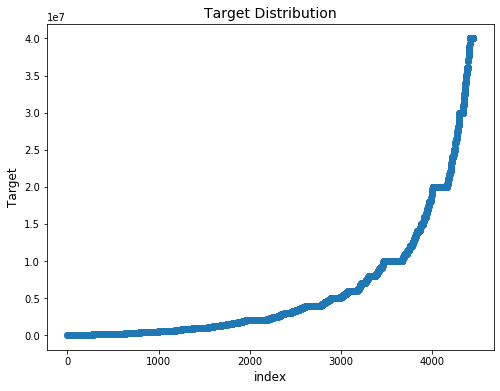

In [28]:
#ScatterPlot
plt.figure(figsize=(8,6))
plt.scatter(range(train_x.shape[0]), np.sort(train_x['target'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title("Target Distribution", fontsize=14)
plt.show()

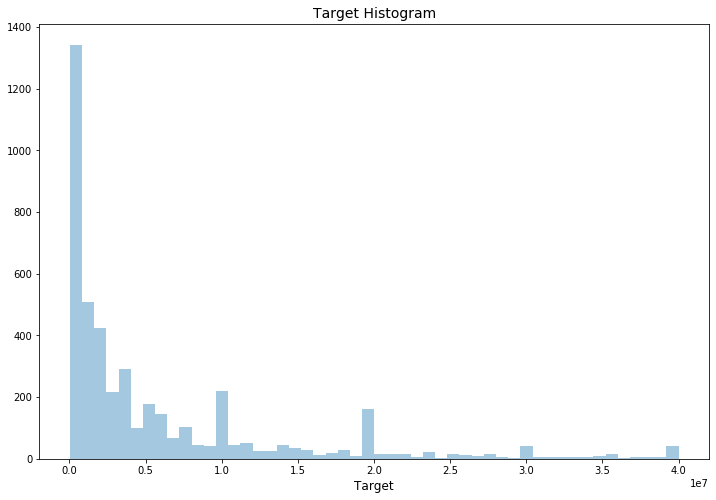

In [29]:
import seaborn as sns
#Histogram
plt.figure(figsize=(12,8))
sns.distplot(train_x["target"].values, bins=50, kde=False)
plt.xlabel('Target', fontsize=12)
plt.title("Target Histogram", fontsize=14)
plt.show()

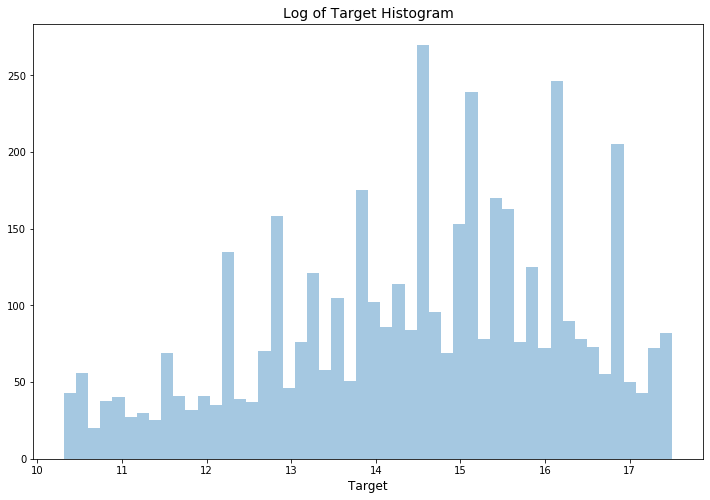

In [30]:
#Histogram normalized by log
plt.figure(figsize=(12,8))
sns.distplot(np.log1p(train_x["target"].values), bins=50, kde=False)
plt.xlabel('Target', fontsize=12)
plt.title("Log of Target Histogram", fontsize=14)
plt.show()

In [5]:
#Copy and remove ID, target
train_y = np.log1p(train_x["target"].values)
test_ids = test_x["ID"].values
#pd.DataFrame({"ID":test_ids}).head()
#train_x = train.copy()
#test_x = test.copy()
train_x.drop(["target", "ID"], axis = 1, inplace = True)
test_x.drop(["ID"],axis=1, inplace = True)
train_x.head()
#test_x.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [19]:
#PCA
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
features = train_x.columns[1:-1]

# Normalize cada caracteristica a norma da unidade (comprimento do vetor)
x_train_normalized = normalize(train_x[features], axis=0)
x_test_normalized = normalize(test_x[features], axis=0)

# Executar PCA
pca = PCA(n_components=3)
x_train_projected = pca.fit_transform(x_train_normalized)
x_test_projected = pca.fit_transform(x_test_normalized)

train_x.insert(1, 'PCAOne', x_train_projected[:, 0])
train_x.insert(1, 'PCATwo', x_train_projected[:, 1])
train_x.insert(1, 'PCAThree', x_train_projected[:, 2])

test_x.insert(1, 'PCAOne', x_test_projected[:, 0])
test_x.insert(1, 'PCATwo', x_test_projected[:, 1])
test_x.insert(1, 'PCAThree', x_test_projected[:, 2])

In [6]:
#Get number of components
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

standardized_train = StandardScaler().fit_transform(train_x.values)
standardized_test = StandardScaler().fit_transform(test_x.values)

def _get_number_components(model, threshold):
    component_variance = model.explained_variance_ratio_
    explained_variance = 0.0
    components = 0

    for var in component_variance:
        explained_variance += var
        components += 1
        if(explained_variance >= threshold):
            break
    return components

### Get the optimal number of components
pca = PCA()
train_pca = pca.fit_transform(standardized_train)
components = _get_number_components(pca, threshold=0.85)
components

994

In [7]:
### Implement PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

standardized_train = StandardScaler().fit_transform(train_x.values)
standardized_test = StandardScaler().fit_transform(test_x.values)

obj_pca = model = PCA(n_components = 20)
x_train_projected = obj_pca.fit_transform(standardized_train)
x_test_projected = obj_pca.fit_transform(standardized_test)

for npca in range(0, 20):
    train_x.insert(1, 'PCA_'+str(npca+1), x_train_projected[:, npca])
    test_x.insert(1, 'PCA_'+str(npca+1), x_test_projected[:, npca])

In [8]:
#TSNE
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(data): 
    x, y, z = data.T
    fig = plt.figure(figsize=(10, 5.5/8*10)) 
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)

from sklearn.manifold import TSNE

def run_tsne(x, components, perplexity=15, lr=75.0):
    tsne = TSNE(n_components = components, 
    verbose = 1, 
    perplexity = perplexity, 
    learning_rate = lr,
    init='pca')
    tsne_results = tsne.fit_transform(x)
    return tsne_results

result = run_tsne(train_x, 3)
train_x = pd.DataFrame(result)

train_x.head()
#plot_3d(results)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 4459 samples in 1.360s...
[t-SNE] Computed neighbors for 4459 samples in 166.906s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4459
[t-SNE] Computed conditional probabilities for sample 2000 / 4459
[t-SNE] Computed conditional probabilities for sample 3000 / 4459
[t-SNE] Computed conditional probabilities for sample 4000 / 4459
[t-SNE] Computed conditional probabilities for sample 4459 / 4459
[t-SNE] Mean sigma: 352244.418414
[t-SNE] KL divergence after 250 iterations with early exaggeration: 322.144318
[t-SNE] KL divergence after 1000 iterations: 22.743935


,0,1,2
0,-15245893.0,-550445.5625,-364689.84375
1,-21474296.0,-702055.1875,-400232.90625
2,-29071180.0,-749727.2500,-472158.71875
3,-30823304.0,-743174.5625,-465479.68750
4,-26216756.0,-725527.6250,-474789.09375


In [8]:
#Feature Engineering
from sklearn import model_selection
from sklearn import ensemble
NUM_OF_FEATURES = 1000
def rmsle(y, pred):
    return np.sqrt(np.mean(np.power(y - pred, 2)))

x1, x2, y1, y2 = model_selection.train_test_split(train_x, train_y, test_size=0.20, random_state=5)
model = ensemble.RandomForestRegressor(n_jobs=-1, random_state=7)
model.fit(x1, y1)
print(rmsle(y2, model.predict(x2)))

col = pd.DataFrame({'importance': model.feature_importances_, 'feature': train_x.columns}).sort_values(
    by=['importance'], ascending=[False])[:NUM_OF_FEATURES]['feature'].values
train_x = train_x[col]
test_x = test_x[col]
train_x.shape

/home/jessica/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.4873645229278973


(4459, 1000)

In [9]:
#Generate new datasets for AutoML
train_x.insert(999, 'target', train_y)
train_x.to_csv('train-menor.csv')

test_x.to_csv('test-menor.csv')

In [10]:
trainm = pd.read_csv("train-menor.csv")
testm = pd.read_csv("test-menor.csv")

print(trainm.shape)
print(testm.shape)

(4459, 1001)
(49342, 1000)


1.4470261392696406


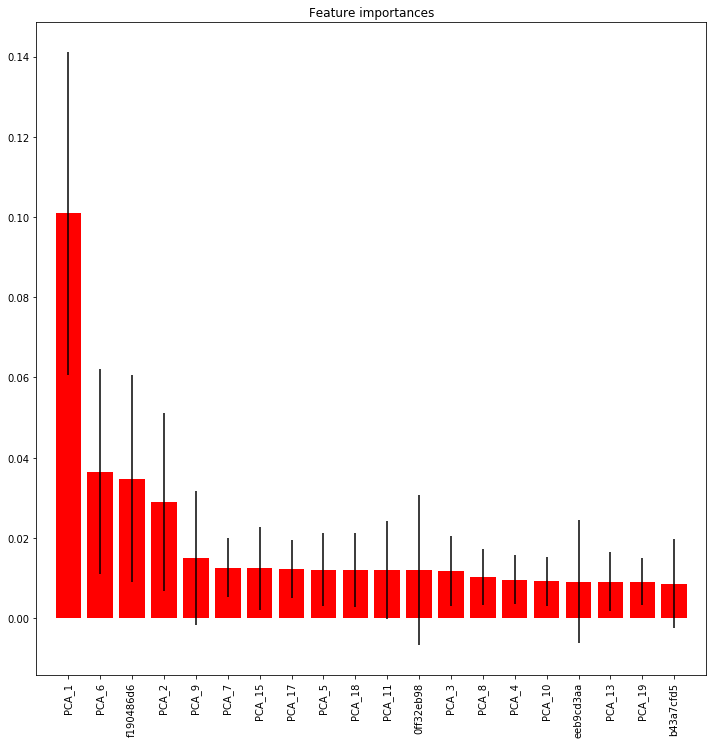

In [29]:
#OtherWay
from sklearn import model_selection
from sklearn import ensemble
def rmsle(y, pred):
    return np.sqrt(np.mean(np.power(y - pred, 2)))

#ExtraTreesRegressor
x1, x2, y1, y2 = model_selection.train_test_split(train_x, train_y, test_size=0.20, random_state=5)
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1) #, random_state=0
model.fit(x1, y1)
print(rmsle(y2, model.predict(x2)))

## plot the importances ##
feat_names = train_x.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [9]:
#LightGBM
import lightgbm as lgb
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 30,
        "learning_rate" : 0.01,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=200, evals_result=evals_result)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [ ]:
from sklearn import model_selection
from sklearn import ensemble

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
pred_test_full = 0
for dev_index, val_index in kf.split(train_x):
    dev_X, val_X = train_x.loc[dev_index,:], train_x.loc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, test_x)
    pred_test_full += pred_test
pred_test_full /= 5.
pred_test_full = np.expm1(pred_test_full)

Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 1.58037
Early stopping, best iteration is:
[222]	valid_0's rmse: 1.57916


In [11]:
# Making a submission file #
sub_df = pd.DataFrame({"ID":test_ids})
sub_df["target"] = pred_test_full
sub_df.to_csv("submission.csv", index=False)